In [110]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.stats as stats

import utils

import importlib
importlib.reload(utils)

import os

# Read Data

In [111]:
#in_dir = '70f80fdf-rounds-10-evidence-1-population-5'
#in_dir = 'abf00068-rounds-10-evidence-4-population-5'
#in_dir = 'd75786f7-data-2018-01-25-big-experiment'
in_dir = '18a75a2d-data-2018-03-19-big-experiment'

#in_dir = 'd9145d2a-rounds-10-evidence-1-population-5'
#in_dir = 'b7d0390f-rounds-10-evidence-4-population-5'

n_evidence = 4

raw_data = pd.read_csv('./data/' + in_dir + '/info.csv')

raw_data = raw_data[raw_data['time_of_death'].isnull()]

data,fails,parts = utils.parse_data(raw_data)

In [112]:
len(raw_data)

1919

In [113]:
#data = data[data['turn'] <= 3]

In [114]:
fails = utils.get_evidence_subset(fails, n_evidence)

In [115]:
data = data[data['net'] > 3]

In [116]:
for i in range(1,11):
    print('Participants on turn ' + str(i) + ':', sum(data['turn'] == i)/4)

Participants on turn 1: 20.0
Participants on turn 2: 20.0
Participants on turn 3: 20.0
Participants on turn 4: 20.0
Participants on turn 5: 20.0
Participants on turn 6: 20.0
Participants on turn 7: 20.0
Participants on turn 8: 20.0
Participants on turn 9: 20.0
Participants on turn 10: 20.0


In [117]:
#data = sim_data

# Analyze Evidence

In [118]:
last_perfs = []
last_pops = []
pops = []
evidences = []
net_evidences = []
final_pops = []
nets = []
probs = []
posteriors = []

num_turns = max(data['turn'])

for net in sorted(set(data['net'])):
    
    raw_evidence,net_evidence,posterior = utils.get_evidence(fails[net])
    
    print('Net', net)
    print(net_evidence[1][:(num_turns-1)])
    print(np.array(net_evidence[num_turns][:(num_turns-1)] * 100,dtype=int)/100.0)
    
    for t in range(num_turns+1):
        
        if t > 1:
            last_perfs += list(net_evidence[num_turns][t-2])
            last_pops += list(mean_pop)
        
        if t > 0:    
            mean_pop = utils.get_pop(data,net,t)
            print(mean_pop)
            
        if t > 1:
            pops += list(mean_pop)

    for window in range(1,num_turns):
        print('Final correlation with last',window,'evidence', np.corrcoef(net_evidence[window][t-2],mean_pop)[0,1])

    evidences += list(net_evidence[1][t-2])
    net_evidences += list(net_evidence[num_turns][t-2])
    final_pops += list(mean_pop)
    nets += [net] * len(list(mean_pop))
    probs += list(parts[net])
    posteriors += list(posterior[num_turns][t-2])

Net 4
[[ 0.    0.25  0.75  0.75  0.25  0.5   0.75  0.75]
 [ 0.5   0.5   0.5   0.25  0.75  0.25  0.25  0.5 ]
 [ 0.25  0.75  0.25  0.    0.25  0.75  0.5   0.5 ]
 [ 0.25  0.75  0.5   0.5   0.25  0.25  0.25  0.75]
 [ 0.5   0.75  0.75  0.5   0.5   0.75  0.5   0.5 ]
 [ 0.25  1.    0.5   0.25  0.5   0.5   0.75  0.5 ]
 [ 0.5   0.25  1.    0.5   0.75  0.5   0.25  0.5 ]
 [ 0.    1.    0.75  0.    0.5   1.    0.5   0.75]
 [ 0.75  1.    0.75  0.25  0.5   0.5   0.5   0.25]]
[[ 0.    0.25  0.75  0.75  0.25  0.5   0.75  0.75]
 [ 0.25  0.37  0.62  0.5   0.5   0.37  0.5   0.62]
 [ 0.25  0.5   0.5   0.33  0.41  0.5   0.5   0.58]
 [ 0.25  0.56  0.5   0.37  0.37  0.43  0.43  0.62]
 [ 0.3   0.6   0.55  0.4   0.4   0.5   0.45  0.6 ]
 [ 0.29  0.66  0.54  0.37  0.41  0.5   0.5   0.58]
 [ 0.32  0.6   0.6   0.39  0.46  0.5   0.46  0.57]
 [ 0.28  0.65  0.62  0.34  0.46  0.56  0.46  0.59]
 [ 0.33  0.69  0.63  0.33  0.47  0.55  0.47  0.55]]
[ 0.55  0.55  0.45  0.5   0.7   0.6   0.7   0.65]
[ 0.45  0.35  0.75  0.85

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:113: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)


In [119]:
colors = np.array(['']*len(probs))
colors[np.array(probs) > 0.5] = 'blue'
colors[np.array(probs) <= 0.5] = 'red'

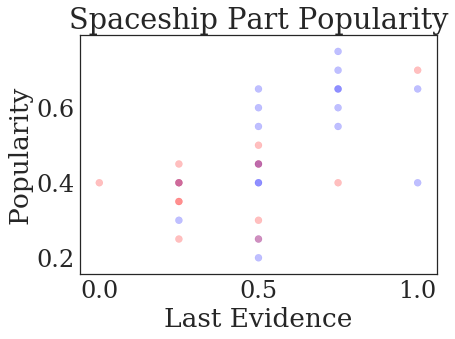

In [120]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(evidences,final_pops,s=50,alpha=0.25,c=colors)
plt.xlabel('Last Evidence')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

In [121]:
np.corrcoef(posteriors,final_pops)

array([[ 1.        ,  0.50871629],
       [ 0.50871629,  1.        ]])

In [122]:
np.corrcoef(net_evidences,final_pops)

array([[ 1.        ,  0.45216929],
       [ 0.45216929,  1.        ]])

In [123]:
np.corrcoef(evidences,final_pops)

array([[ 1.       ,  0.5828723],
       [ 0.5828723,  1.       ]])

In [124]:
np.corrcoef([x for i in range(4,8) for x in parts[i]],final_pops)

array([[ 1.        ,  0.35013386],
       [ 0.35013386,  1.        ]])

In [125]:
np.corrcoef([x for net in range(4,8) for x in utils.get_evidence(fails[net])[1][1][num_turns-2] ],final_pops)

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:113: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)


array([[ 1.       ,  0.5828723],
       [ 0.5828723,  1.       ]])

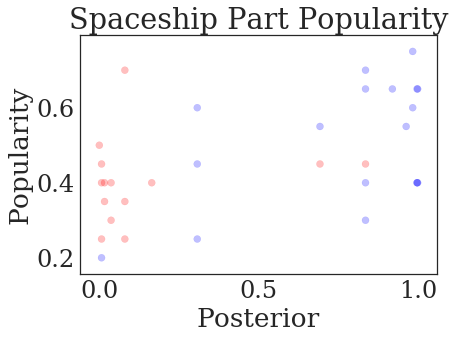

In [126]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(posteriors,final_pops,s=50,alpha=0.25,c=colors)
plt.xlabel('Posterior')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

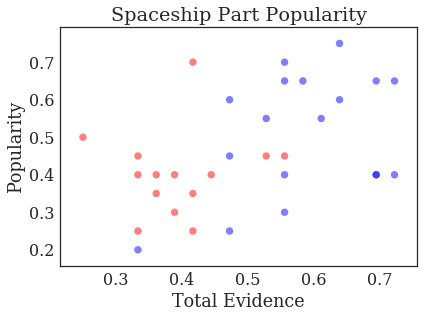

In [127]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(net_evidences,final_pops,s=50,alpha=0.5,c=colors)
plt.xlabel('Total Evidence')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
plt.savefig('pop-evidence.jpg', bbox_inches = 'tight')

In [161]:
pd.DataFrame({'evidence':net_evidences,'popularity':final_pops, 'game':nets}).to_csv('evidence-pops.csv')

In [163]:
os.system('Rscript analyze.R > tmp')
with open('tmp') as f:
    for l in f.readlines():
        print(l)



Call:

lm(formula = d[, "evidence"] ~ d[, "popularity"] + factor(d[, 

    "game"]))



Residuals:

      Min        1Q    Median        3Q       Max 

-0.194636 -0.083540 -0.009525  0.065913  0.225215 



Coefficients:

                     Estimate Std. Error t value Pr(>|t|)    

(Intercept)           0.34110    0.07827   4.358 0.000171 ***

d[, "popularity"]     0.34914    0.14110   2.474 0.019919 *  

factor(d[, "game"])5  0.07510    0.05718   1.313 0.200146    

factor(d[, "game"])6 -0.01091    0.05735  -0.190 0.850534    

factor(d[, "game"])7 -0.07104    0.05815  -1.222 0.232406    

---

Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Residual standard error: 0.1144 on 27 degrees of freedom

Multiple R-squared:  0.3582,	Adjusted R-squared:  0.2631 

F-statistic: 3.767 on 4 and 27 DF,  p-value: 0.01466





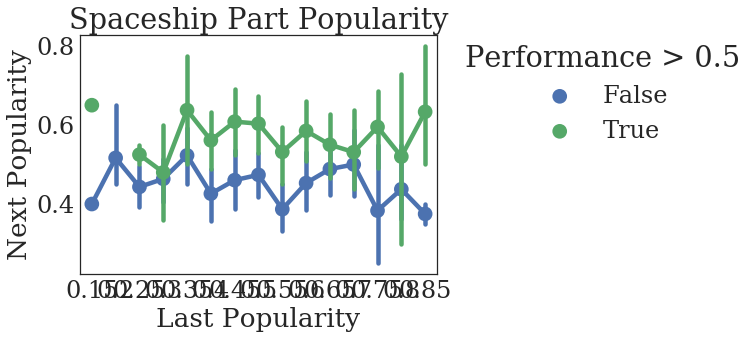

In [130]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot(last_pops,pops,np.array(last_perfs) > 0.5)
plt.xlabel('Last Popularity')
plt.ylabel('Next Popularity')
plt.title('Spaceship Part Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Performance > 0.5')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

In [131]:
np.array(pops)[np.array(last_pops) == 0]

array([], dtype=float64)

# Analyze Reward

In [132]:
rewards = []

for net in sorted(set(data['net'])):
    
    rewards += [[]]
    for t in range(num_turns+1):

        if t > 0:
            rewards[-1] += [utils.get_reward(data,parts,net,t)]

rewards = np.transpose(np.array(rewards))

[ 0.55  0.55  0.45  0.5   0.7   0.6   0.7   0.65] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.45  0.35  0.75  0.85  0.55  0.55  0.8   0.75] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.65  0.45  0.55  0.4   0.8   0.35  0.4   0.65] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.4   0.85  0.4   0.45  0.4   0.75  0.6   0.55] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.25  0.6   0.35  0.45  0.45  0.35  0.35  0.7 ] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.3   0.6   0.5   0.4   0.65  0.45  0.3   0.45] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.25  0.7   0.5   0.2   0.45  0.5   0.5   0.65] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.4   0.3   0.75  0.45  0.75  0.4   0.45  0.65] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.25  0.3   0.8   0.3   0.55  0.75  0.3   0.8 ] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.4   0.4   0.75  0.45  0.25  0.65  0.6   0.3 ] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.7   0.75  0.7   0.5   0.7   0.5   0.7   0.55] [-0.1  0.1 -0.1  0.1 -0.1  0.1

In [133]:
print('Average reward each turn:')
for i,r in enumerate(np.mean(rewards,1)):
    print('Turn ' + str(i+1) + ':', r)

Average reward each turn:
Turn 1: 0.00578125
Turn 2: 0.01203125
Turn 3: 0.00703125
Turn 4: 0.01390625
Turn 5: 0.0084375
Turn 6: 0.00671875
Turn 7: 0.0115625
Turn 8: 0.00640625
Turn 9: 0.0115625
Turn 10: 0.0109375


In [134]:
rewards

array([[ 0.0325  ,  0.01125 ,  0.013125, -0.03375 ],
       [ 0.030625,  0.02125 ,  0.0175  , -0.02125 ],
       [ 0.026875,  0.01    ,  0.0125  , -0.02125 ],
       [ 0.03375 ,  0.01875 ,  0.026875, -0.02375 ],
       [ 0.02625 ,  0.01375 ,  0.01875 , -0.025   ],
       [ 0.028125,  0.01125 ,  0.0125  , -0.025   ],
       [ 0.035625,  0.01625 ,  0.0075  , -0.013125],
       [ 0.030625,  0.010625,  0.013125, -0.02875 ],
       [ 0.036875,  0.01125 ,  0.02125 , -0.023125],
       [ 0.02625 ,  0.014375,  0.021875, -0.01875 ]])

In [135]:
all_rewards = pd.DataFrame([[i,j,r] for i in range(len(rewards)) for j,r in enumerate(rewards[i])])
all_rewards.columns = ['turn','net','reward']

In [136]:
[sum(parts[i] == 0.6) for i in parts]

[5, 7, 3, 5, 5, 6, 5, 2]

In [137]:
-0.1*0.4*6/8 + 0.1*0.6*2/8

-0.015000000000000006

In [138]:
all_rewards.groupby(['turn','net']).mean()

reward
turn net          
0    0    0.032500
     1    0.011250
     2    0.013125
     3   -0.033750
1    0    0.030625
     1    0.021250
     2    0.017500
     3   -0.021250
2    0    0.026875
     1    0.010000
     2    0.012500
     3   -0.021250
3    0    0.033750
     1    0.018750
     2    0.026875
     3   -0.023750
4    0    0.026250
     1    0.013750
     2    0.018750
     3   -0.025000
5    0    0.028125
     1    0.011250
     2    0.012500
     3   -0.025000
6    0    0.035625
     1    0.016250
     2    0.007500
     3   -0.013125
7    0    0.030625
     1    0.010625
     2    0.013125
     3   -0.028750
8    0    0.036875
     1    0.011250
     2    0.021250
     3   -0.023125
9    0    0.026250
     1    0.014375
     2    0.021875
     3   -0.018750

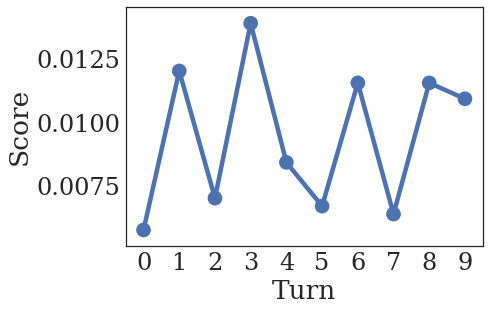

In [139]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot('turn','reward',data=all_rewards,ci=None)
plt.xlabel('Turn')
plt.ylabel('Score')
plt.savefig('score-over-time.jpg', bbox_inches = 'tight')


In [140]:
print(stats.linregress(all_rewards['turn'], all_rewards['reward']))

LinregressResult(slope=0.00018939393939393934, intercept=0.0085852272727272704, rvalue=0.026505449685768886, pvalue=0.87103192631913018, stderr=0.001158741321289659)


In [141]:
all_rewards.to_csv('all_rewards.csv')

In [142]:

turn = []
seen = []
perf = []
choice = []
net = []
item = []

for i,row in data.iterrows():
    
    if len(row['viewed']) > 0:
        
        print('----')
        print(row['net'],row['turn'])
        print(row['viewed'])
        print(fails[row['net']][row['turn']-2])
        print(row['action'])
        
        for j in range(len(row['action'])):
            
            these_successes = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'success')
            these_fails = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'fail')
            
            turn += [row['turn']]
            seen += [row['viewed'][j][0] != '0']
            perf += [these_successes - these_fails]
            choice += [row['action'][j]]
            net += [row['net']]
            item += [j]
            
indiv_choices = pd.DataFrame({'turn':turn,'seen':seen,'perf':perf,'choice':choice,'net':net,'item':item})

----
5 1
[['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0']]
[['fail' 'fail' 'fail' 'fail']
 ['fail' 'fail' 'success' 'success']
 ['success' 'fail' 'fail' 'success']
 ['success' 'fail' 'fail' 'success']
 ['fail' 'success' 'fail' 'fail']
 ['success' 'success' 'fail' 'fail']
 ['fail' 'fail' 'success' 'fail']
 ['fail' 'fail' 'success' 'success']]
[1, 1, 1, 1, 1, 1, 1, 1]
----
4 1
[['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0']]
[['fail' 'fail' 'fail' 'success']
 ['success' 'fail' 'success' 'success']
 ['fail' 'fail' 'success' 'success']
 ['fail' 'success' 'fail' 'fail']
 ['fail' 'fail' 'success' 'success']
 ['fail' 'fail' 'fail' 'success']
 ['success' 'fail' 'success' 'success']
 ['success' 'success' 'success' 'success']]
[0, 0, 0, 0, 1, 1,

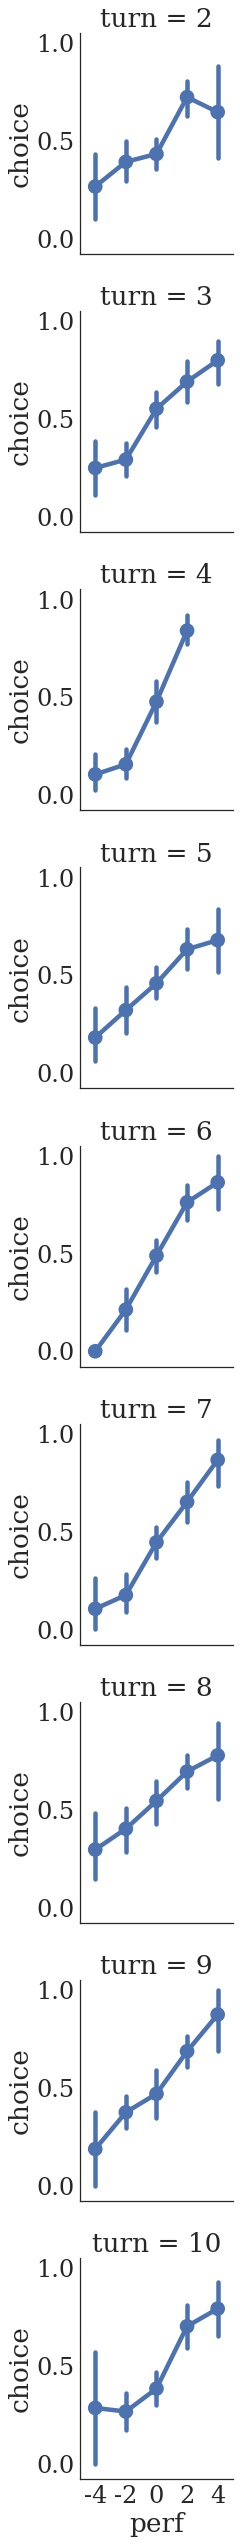

In [143]:
sns.factorplot('perf', 'choice', row = 'turn', data = indiv_choices[seen])


In [144]:
agg = indiv_choices[seen].groupby(['perf','turn','item','net']).mean()
agg

choice  seen
perf turn item net                
-4   2    0    4    0.250000  True
          3    5    0.333333  True
          7    7    0.230769  True
     3    0    6    0.294118  True
          4    6    0.272727  True
          6    7    0.125000  True
     4    1    6    0.181818  True
          3    4    0.000000  True
               7    0.200000  True
          5    7    0.000000  True
     5    2    7    0.133333  True
          4    6    0.166667  True
          5    7    0.333333  True
     6    7    7    0.000000  True
     7    2    7    0.153846  True
          7    7    0.000000  True
     8    3    7    0.000000  True
          5    7    0.315789  True
          7    7    0.285714  True
     9    0    4    0.200000  True
          3    4    0.181818  True
     10   1    6    0.285714  True
-2   2    1    4    0.333333  True
               7    0.357143  True
          2    5    0.285714  True
          4    4    0.454545  True
               7    0.636364  True
          5    7    0.454545  True
          6    7    0.272727  True
     3    0    5    0.363636  True
...                      ...   ...
 2   9    5    6    0.600000  True
          6    5    0.666667  True
          7    4    0.823529  True
               6    0.857143  True
     10   0    4    0.400000  True
               6    0.857143  True
          2    4    0.800000  True
               6    0.666667  True
          3    5    0.625000  True
          7    5    0.750000  True
               6    0.687500  True
 4   2    0    7    0.700000  True
          5    5    0.571429  True
     3    0    7    0.764706  True
          1    5    0.818182  True
          3    6    0.846154  True
          4    5    0.777778  True
     5    5    5    0.666667  True
          7    5    0.687500  True
     6    2    5    0.866667  True
          5    5    0.857143  True
     7    1    4    0.823529  True
          5    7    0.923077  True
     8    0    6    0.571429  True
          2    4    0.909091  True
     9    1    4    0.800000  True
          5    4    0.909091  True
     10   0    7    0.909091  True
          1    4    0.500000  True
          3    7    0.785714  True

[288 rows x 2 columns]

In [145]:
np.mean(agg.loc[[-4,-2],:,:,:]['choice'] == 0)

0.098901098901098897

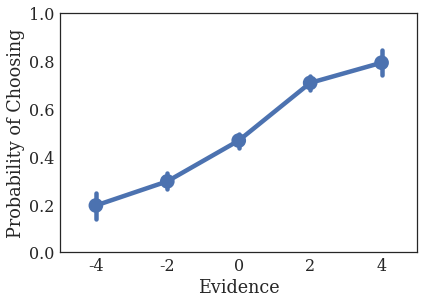

In [146]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot('perf', 'choice', data = indiv_choices[seen])
plt.ylim(0,1)
plt.xlabel('Evidence')
plt.ylabel('Probability of Choosing')
plt.savefig('response-curve.jpg', bbox_inches = 'tight')

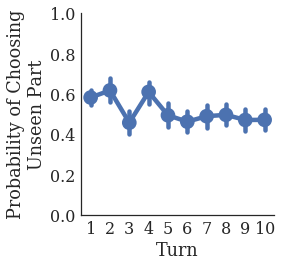

In [147]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.factorplot('turn', 'choice', data = indiv_choices[~np.array(seen)])
plt.xlabel('Turn')
plt.ylabel('Probability of Choosing\nUnseen Part')
plt.ylim(0,1)
plt.savefig('unseen-parts.jpg', bbox_inches = 'tight')

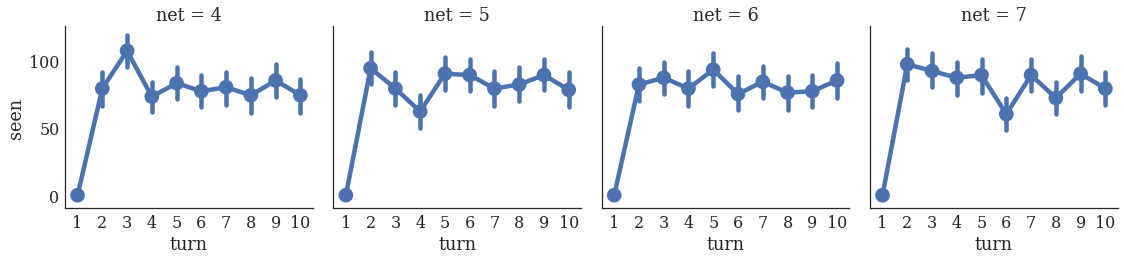

In [148]:
sns.factorplot('turn', 'seen', col = 'net', data = indiv_choices, estimator = sum)

In [149]:
(0.6**3 * 0.4**1)/(0.6**3 * 0.4**1 + 0.4**3 * 0.6**1)

0.6923076923076923

In [150]:
num_turns = max(data['turn'])
num_agents = int(sum(data['turn'] == max(data['turn'])) / len(set(nets)))
num_actions = 8
actions = []

for n in set(nets):
        
    for t in range(num_turns):
        
        this_actions = []
    
        for i in range(num_agents):
            
            action = [n,t,i,[]]
        
            for j in range(num_actions):
                
                if t > 0:
                    viewed_fails = last_actions[np.random.choice(num_agents)]
                    
                if t == 0:
                    choice = np.random.random() < 0.5
                elif not viewed_fails[j]:
                    choice = np.random.random() < 0.5
                else:
                    signal = np.mean(fails[n][t][j] == 'success')
                    if signal == 1.0:
                        choice = np.random.random() < 0.8
                    elif signal == 0.75:
                        choice = np.random.random() < 0.75
                    elif signal == 0.5:
                        choice = np.random.random() < 0.5
                    elif signal == 0.25:
                        choice = np.random.random() < 0.25
                    elif signal == 0.0:
                        choice = np.random.random() < 0.2
                    else:
                        assert False
                    
                action[-1] += [choice]
                
            this_actions += [action[-1]]
            actions += [action]
            
        last_actions = this_actions
            

In [151]:
sim_data = pd.DataFrame(actions)
sim_data.columns = ['net','turn','agent','action']

In [152]:
len(last_actions)

20

In [153]:
sim_rewards = []

for net in sorted(set(data['net'])):
    
    sim_rewards += [[]]
    for t in range(num_turns):
        sim_rewards[-1] += [utils.get_reward(sim_data,parts,net,t)]

sim_rewards = np.transpose(np.array(sim_rewards))

[ 0.5   0.45  0.5   0.45  0.5   0.5   0.5   0.45] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.5   0.55  0.35  0.3   0.65  0.45  0.45  0.4 ] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.5   0.6   0.25  0.7   0.1   0.6   0.6   0.55] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.35  0.5   0.4   0.4   0.4   0.4   0.2   0.7 ] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.3   0.65  0.55  0.45  0.55  0.7   0.6   0.2 ] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.45  0.65  0.45  0.35  0.5   0.55  0.7   0.45] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.4   0.3   0.65  0.25  0.5   0.35  0.35  0.75] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.35  0.65  0.45  0.5   0.55  0.6   0.5   0.8 ] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.55  0.6   0.65  0.5   0.6   0.45  0.45  0.4 ] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.8   0.5   0.4   0.35  0.55  0.65  0.6   0.3 ] [-0.1  0.1  0.1 -0.1  0.1  0.1  0.1  0.1]
[ 0.55  0.8   0.5   0.35  0.55  0.5   0.65  0.5 ] [-0.1  0.1 -0.1  0.1 -0.1  0.1

In [154]:
sim_rewards

array([[ 0.024375,  0.015   ,  0.01375 , -0.0275  ],
       [ 0.025625,  0.0125  ,  0.018125, -0.028125],
       [ 0.01875 ,  0.018125,  0.019375, -0.020625],
       [ 0.023125,  0.0175  ,  0.01875 , -0.0325  ],
       [ 0.03125 ,  0.013125,  0.0225  , -0.020625],
       [ 0.03125 ,  0.013125,  0.016875, -0.020625],
       [ 0.028125,  0.015625,  0.019375, -0.019375],
       [ 0.03375 ,  0.024375,  0.016875, -0.03125 ],
       [ 0.02625 ,  0.0125  ,  0.0275  , -0.02375 ],
       [ 0.023125,  0.021875,  0.01    , -0.020625]])

In [155]:
print('Average reward each turn:')
for i,r in enumerate(np.mean(sim_rewards,1)):
    print('Turn ' + str(i+1) + ':', r)

Average reward each turn:
Turn 1: 0.00640625
Turn 2: 0.00703125
Turn 3: 0.00890625
Turn 4: 0.00671875
Turn 5: 0.0115625
Turn 6: 0.01015625
Turn 7: 0.0109375
Turn 8: 0.0109375
Turn 9: 0.010625
Turn 10: 0.00859375


In [156]:
all_sim_rewards = pd.DataFrame([[i,j,r] for i in range(len(sim_rewards)) for j,r in enumerate(sim_rewards[i])])
all_sim_rewards.columns = ['turn','net','reward']

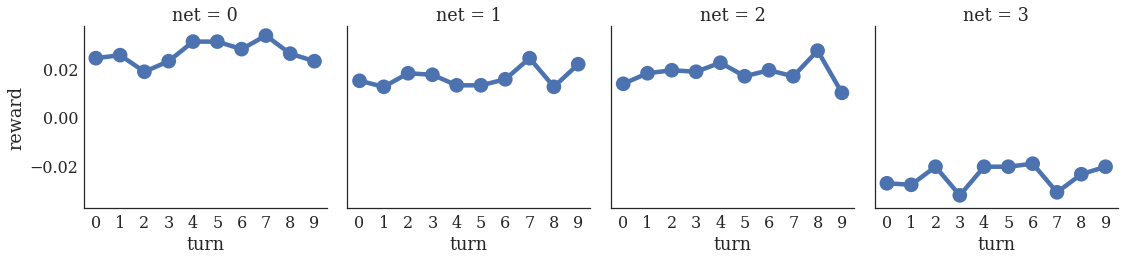

In [157]:
sns.factorplot('turn','reward',col='net',data=all_sim_rewards)

In [158]:
print(stats.linregress(all_sim_rewards['turn'], all_sim_rewards['reward']))

LinregressResult(slope=0.00040151515151515185, intercept=0.007380681818181814, rvalue=0.056826961419615893, pvalue=0.727622266691619, stderr=0.0011443354089182096)
